In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv

#ran into depricated seaborn model and sklearn model. Found up to date versions

df = pd.read_csv("../../DeathRate.csv")

country = df.loc[df['Country Name'] == 'Ireland']
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array



#print(df)

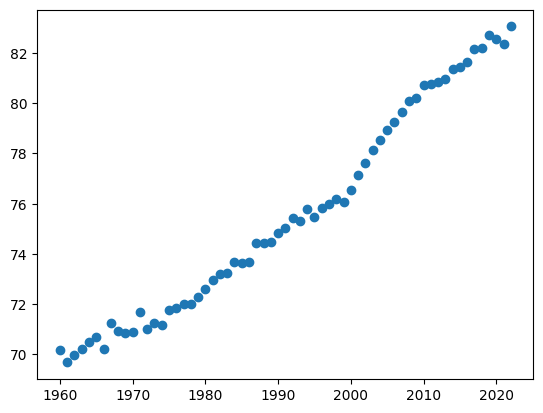

In [107]:
plt.scatter(x, y)


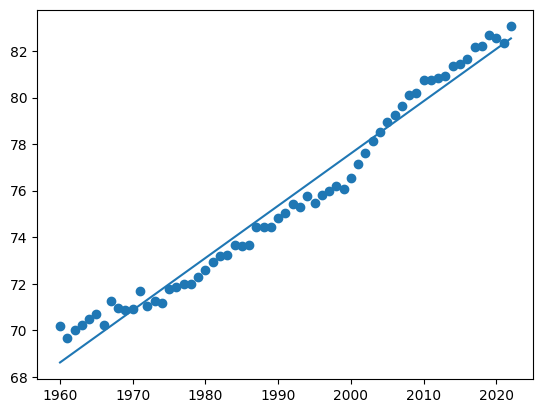

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x, y) 
y_pred = model.predict(x)

# Plot regression line
plt.scatter(x, y)
plt.plot(x, y_pred)

In [91]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [0.17560796]
Model intercept: [-277.77276365]


In [6]:

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

ValueError: Expected 2D array, got 1D array instead:
array=[2 3 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.